https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

https://towardsdatascience.com/what-does-it-take-for-an-apartment-in-barcelona-to-be-a-survivor-10e0ad337672
https://opendata-ajuntament.barcelona.cat/data/en/dataset/est-mercat-immobiliari-lloguer-mitja-mensual
https://diegoquintanav.github.io/folium-barcelona-EN.html

https://opendata-ajuntament.barcelona.cat/data/en/dataset?res_format=SHP

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

pd.set_option('display.max_columns', None)

#df = pd.read_pickle('./stanovi/data.pkl')
df.to_csv('./stanovi/data.csv',index=False)

df2 = pd.read_csv('./stanovi/data.csv')

In [33]:
print('\n\nInfo')
print(df.info())

print('\n\nNull Elements')
print(df.isnull().sum())



Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 551
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   2211 non-null   int64  
 1   propertyCode            2211 non-null   object 
 2   thumbnail               2187 non-null   object 
 3   externalReference       1953 non-null   object 
 4   numPhotos               2211 non-null   int64  
 5   floor                   2076 non-null   object 
 6   price                   2211 non-null   float64
 7   propertyType            2211 non-null   object 
 8   operation               2211 non-null   object 
 9   size                    2211 non-null   float64
 10  exterior                2211 non-null   bool   
 11  rooms                   2211 non-null   int64  
 12  bathrooms               2211 non-null   int64  
 13  address                 2211 non-null   object 
 14  province                2211 non-n

In [34]:

df = df.drop(columns=['index', 'thumbnail', 'externalReference', 'numPhotos', 'province', 'country', 'showAddress', 'url', 'hasVideo', 'hasPlan', 'has3DTour', 'has360'])
df.propertyCode = df.propertyCode.astype(int)
#df.set_index('propertyCode', inplace = True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,propertyCode,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,address,municipality,district,neighborhood,latitude,longitude,distance,newDevelopment,priceByArea,detailedType,suggestedTexts,status,hasLift,parkingSpace,newDevelopmentFinished,Week,topNewDevelopment
0,87688139,3,172000.0,flat,sale,67.0,False,2,2,"Calle de Provença, 127",Barcelona,Eixample,L'Antiga Esquerra de l'Eixample,41.387739,2.151873,1154,False,2567.0,{'typology': 'flat'},"{'subtitle': 'L'Antiga Esquerra de l'Eixample,...",NaN,NaN,NaN,NaN,14,NaN
1,89127122,2,130000.0,flat,sale,32.0,True,1,1,barrio El Raval,Barcelona,Ciutat Vella,El Raval,41.380189,2.165333,880,False,4063.0,{'typology': 'flat'},"{'subtitle': 'El Raval, Barcelona', 'title': '...",good,False,NaN,NaN,14,NaN
2,89115559,1,149000.0,flat,sale,45.0,False,2,1,"Calle d'Arnau d'Oms, 44",Barcelona,Nou Barris,Porta,41.430582,2.177449,4824,False,3311.0,{'typology': 'flat'},"{'subtitle': 'Porta, Barcelona', 'title': 'Pis...",good,True,NaN,NaN,14,NaN
3,89102591,5,220000.0,flat,sale,54.0,True,2,1,barrio La Sagrada Família,Barcelona,Eixample,La Sagrada Família,41.410451,2.178700,2711,False,4074.0,{'typology': 'flat'},"{'subtitle': 'La Sagrada Família, Barcelona', ...",good,True,NaN,NaN,14,NaN
4,89123676,bj,103000.0,flat,sale,67.0,False,2,1,"Calle de Travau, 29",Barcelona,Nou Barris,Can Peguera - El Turó de la Peira,41.432788,2.169198,4977,False,1537.0,{'typology': 'flat'},{'subtitle': 'Can Peguera - El Turó de la Peir...,renew,True,NaN,NaN,14,NaN


# Classify missing district and neighborhood to district based on geolocation 

In [35]:
print('\n\n There are '+ repr(df.district.isnull().sum()) +' Null Elements in district')

index_missing = df.index[df.district.isnull()]

X = df.dropna(subset=['district']).loc[:,['latitude', 'longitude']]
y= df.dropna(subset =['district']).loc[:,'district']
assert X.shape[0]==y.shape[0], 'Dimensions do not match!'
model = neighbors.KNeighborsClassifier(2, weights='distance')
## evaluate a knn model on the dataset using k-fold cross validation
# kfold = KFold(n_splits=3, random_state=7)
# result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# print(result.mean())
model.fit(X,y)
df.loc[index_missing, 'district'] = model.predict(X=df.loc[index_missing,['latitude', 'longitude']])



 There are 45 Null Elements in district


In [36]:
print('\n\n There are '+ repr(df.neighborhood.isnull().sum()) +' Null Elements in neighborhood')

index_missing = df.index[df.neighborhood.isnull()]

X = df.dropna(subset=['neighborhood']).loc[:,['latitude', 'longitude']]
y= df.dropna(subset =['neighborhood']).loc[:,'district']
assert X.shape[0]==y.shape[0], 'Dimensions do not match!'
model = neighbors.KNeighborsClassifier(2, weights='distance')
## evaluate a knn model on the dataset using k-fold cross validation
# kfold = KFold(n_splits=3, random_state=7)
# result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# print(result.mean())
model.fit(X,y)
df.loc[index_missing, 'neighborhood'] = model.predict(X=df.loc[index_missing,['latitude', 'longitude']])



 There are 45 Null Elements in neighborhood


# Remove Duplicates

In [37]:
# Remove duplicates
df.drop_duplicates(subset=['propertyCode','price','Week'],inplace=True)

# remove too big by surface
index_to_drop = df.index[df['size'] > 150]
df.drop(index = index_to_drop, inplace = True)
#sns.distplot(df['size'], bins = 100, kde=False, rug=True)

df.reset_index(drop=True, inplace=True)

# Geolocation

/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


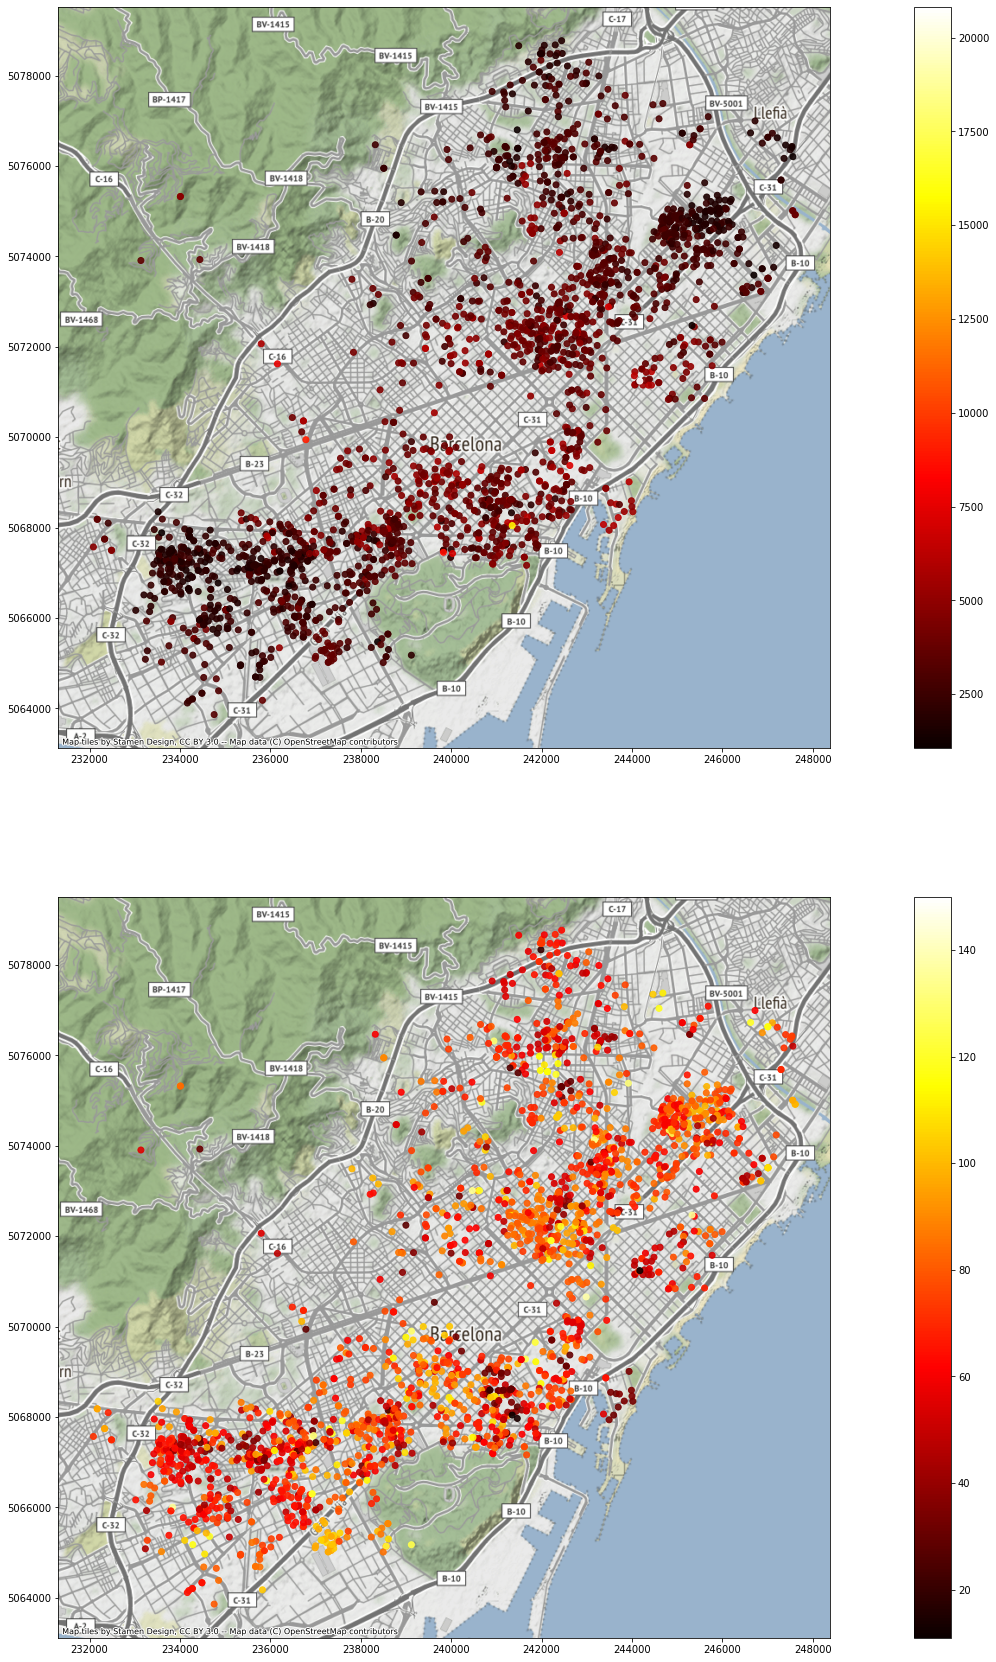

In [38]:
import geopandas as gpd
import descartes
import contextily as ctx


gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = {'init' :'epsg:4326'}
gdf= gdf.to_crs(epsg=3857)


fig, ax = plt.subplots(nrows=2,figsize=(30,30))
gdf.plot(column='priceByArea', cmap='hot', legend=True, alpha=0.9, ax=ax[0])
ctx.add_basemap(ax[0])

gdf.plot(column='size', cmap='hot', legend=True, alpha=0.9, ax=ax[1])
ctx.add_basemap(ax[1])


In [39]:
for i in df['neighborhood'].value_counts():
    print(i)

137
104
94
76
75
72
72
71
70
64
56
47
47
46
42
41
38
38
37
35
34
34
33
33
32
32
31
31
31
30
30
28
27
27
27
26
26
23
22
22
21
20
20
20
19
14
14
13
12
12
11
11
10
9
9
8
8
8
7
7
6
6
6
5
4
4
4
4
4
3
3
3
2
2
2
2
1
1


# Number of rooms

[Text(0, 0, 'Eixample'),
 Text(0, 0, 'Ciutat Vella'),
 Text(0, 0, 'Nou Barris'),
 Text(0, 0, 'Sant Martí'),
 Text(0, 0, 'Sants-Montjuïc'),
 Text(0, 0, 'Horta Guinardó'),
 Text(0, 0, 'Sant Andreu'),
 Text(0, 0, 'Gràcia'),
 Text(0, 0, 'La Torrasa'),
 Text(0, 0, 'La Florida - Les Planes'),
 Text(0, 0, 'Santa Eulàlia'),
 Text(0, 0, 'Can Serra - Pubilla Cases'),
 Text(0, 0, 'Granvia L-H'),
 Text(0, 0, 'Bellvitge'),
 Text(0, 0, 'Sarrià-Sant Gervasi'),
 Text(0, 0, 'Collblanc'),
 Text(0, 0, 'Centre'),
 Text(0, 0, 'Les Corts'),
 Text(0, 0, 'Llefià - Sant Roc - Artigues'),
 Text(0, 0, 'Gorg  - Progrés')]

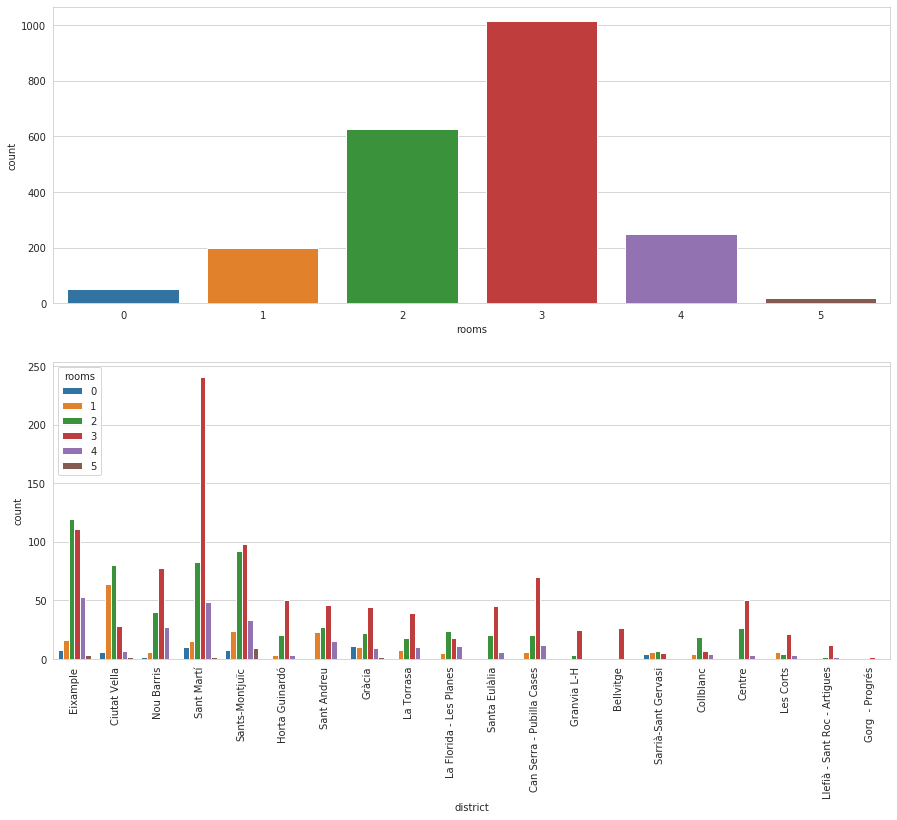

In [40]:
sns.set_style("whitegrid")
fig_size = (15,12)
fig, ax = plt.subplots(2, figsize=fig_size)

chart_roomCount = sns.countplot(x='rooms', orient = 0, data = df, ax = ax[0])
chart_roomCountDistict = sns.countplot(x = 'district', hue = 'rooms', orient = 0, data = df, ax = ax[1])
chart_roomCountDistict.set_xticklabels(chart_roomCountDistict.get_xticklabels(),rotation=90)



In [41]:
# Clean floor
df['floorSort'] = df.floor
df['floorSort'].replace('en', str(0), inplace= True) # entreplanta = 0
df['floorSort'].replace('bj', str(-1), inplace= True) # bajo = -1
df['floorSort'].replace('ss', str(-1), inplace= True) # semisotano = -1
df['floorSort'].replace('st', str(-1), inplace= True) # semisotano = -1
df['floorSort'].replace(np.nan, str(-2), inplace= True) # nan = -2
#df.loc[df['floor'].isna(), 'floor']= str(-2) # nan = -2
df.floorSort = df.floorSort.apply(pd.to_numeric)

df.floor.fillna(value='Unknown', inplace=True)

#df.floor.unique()
#df.loc[df.floor=='ss']

#a = df.loc[3, 'floor']
#type(a)

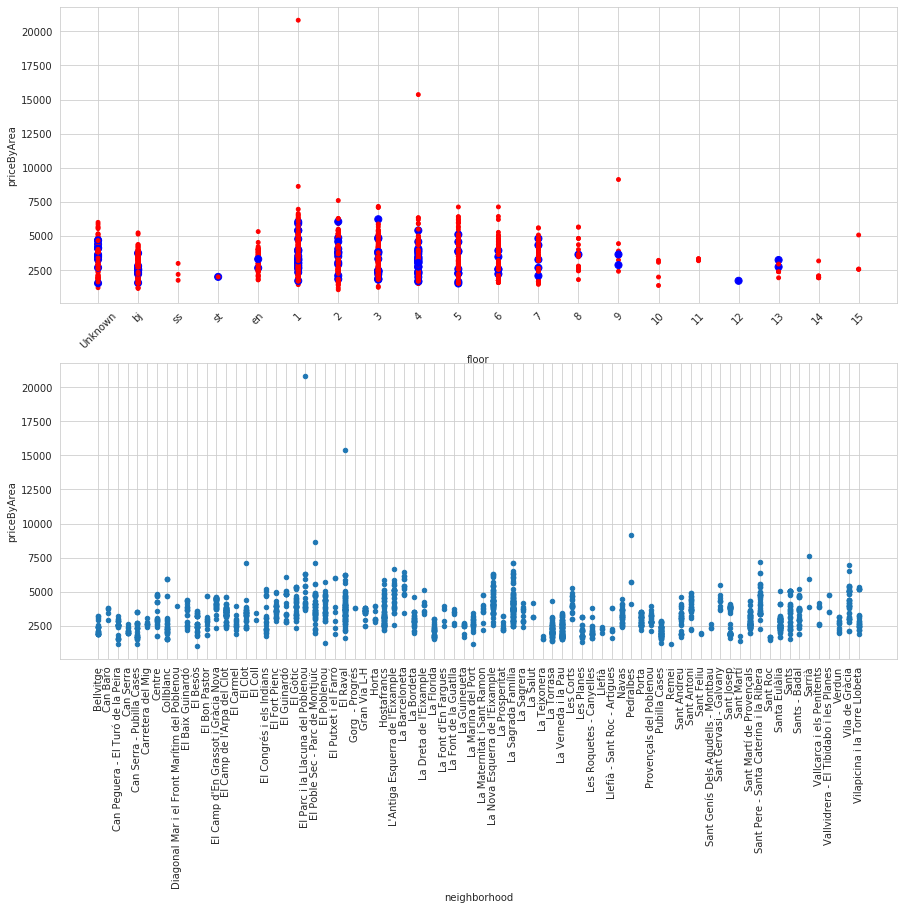

In [42]:
# col = df['exterior'].map({False:'b', True:'r'})
col = df['propertyType'].apply(lambda x: 'b' if x=='penthouse' else 'r')
size = df['propertyType'].apply(lambda x: 50 if x=='penthouse' else 15)

fig_size = (15,12)
fig, ax = plt.subplots(2, figsize=fig_size)
df.sort_values(by='floorSort').plot.scatter(y='priceByArea', x='floor', rot = 45, c=col, s=size, ax=ax[0])
df.sort_values(by=['neighborhood']).plot.scatter(y='priceByArea', x='neighborhood', rot=90, ax=ax[1])




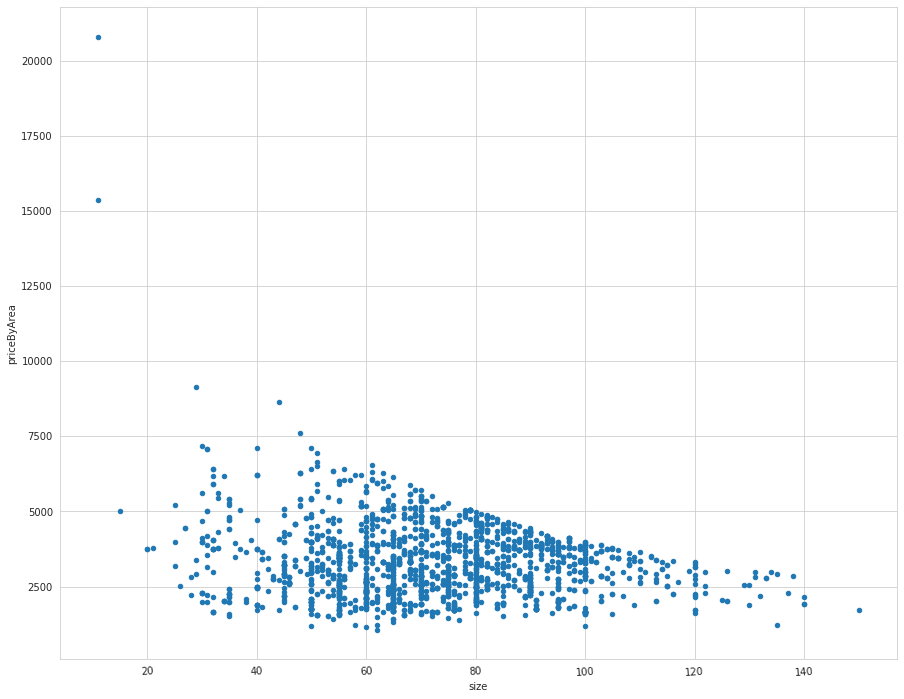

In [43]:
fig_size = (15,12)
fig, ax = plt.subplots(figsize=fig_size)
df.sort_values(by='floorSort').plot.scatter(y='priceByArea', x='size', rot = 4, ax=ax)





In [44]:
assert(len(df.exterior.unique())==2), "Exterior doesn't have only True/False categories"

In [ ]:
#df = df[df['size'] < 1000]

#df.drop(index='cow', columns='small')


In [ ]:
a.head()

In [45]:
df[df.priceByArea>7000]

,propertyCode,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,address,municipality,district,neighborhood,latitude,longitude,distance,newDevelopment,priceByArea,detailedType,suggestedTexts,status,hasLift,parkingSpace,newDevelopmentFinished,Week,topNewDevelopment,geometry,floorSort
39,89103998,3,220000.0,flat,sale,31.0,True,1,1,Calle del Rosselló,Barcelona,Eixample,La Sagrada Família,41.407178,2.177150,2326,False,7097.0,{'typology': 'flat'},"{'subtitle': 'La Sagrada Família, Barcelona', ...",NaN,True,NaN,NaN,14,NaN,POINT (2.17715 41.40718),3
136,89121181,2,364800.0,flat,sale,48.0,True,1,1,Calle d' Euterpe,Barcelona,Sarrià-Sant Gervasi,Sarrià,41.400677,2.121443,3947,False,7600.0,{'typology': 'flat'},"{'subtitle': 'Sarrià, Barcelona', 'title': 'Pi...",good,True,NaN,NaN,14,NaN,POINT (2.12144 41.40068),2
438,89152594,9,265000.0,flat,sale,29.0,True,2,1,Calle del Capità Arenas,Barcelona,Les Corts,Pedralbes,41.389364,2.127101,3222,False,9138.0,{'typology': 'flat'},"{'subtitle': 'Pedralbes, Barcelona', 'title': ...",NaN,True,NaN,NaN,15,NaN,POINT (2.12710 41.38936),9
905,89192623,3,220000.0,flat,sale,31.0,True,1,1,Calle del Rosselló,Barcelona,Eixample,La Sagrada Família,41.407778,2.178850,2447,False,7097.0,{'typology': 'flat'},"{'subtitle': 'La Sagrada Família, Barcelona', ...",NaN,True,NaN,NaN,16,NaN,POINT (2.17885 41.40778),3
916,89192621,3,215000.0,flat,sale,30.0,False,1,1,Calle d'En Giralt el Pellicer,Barcelona,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,41.385515,2.179558,1191,False,7167.0,{'typology': 'flat'},{'subtitle': 'Sant Pere - Santa Caterina i la ...,NaN,NaN,NaN,NaN,16,NaN,POINT (2.17956 41.38551),3
940,89209084,1,380000.0,flat,sale,44.0,True,2,1,Calle de la Font Honrada,Barcelona,Sants-Montjuïc,El Poble Sec - Parc de Montjuïc,41.372571,2.154425,1966,False,8636.0,{'typology': 'flat'},"{'subtitle': 'El Poble Sec - Parc de Montjuïc,...",good,True,NaN,NaN,16,NaN,POINT (2.15443 41.37257),1
1060,89198968,6,356500.0,flat,sale,50.0,True,1,1,Avenida Meridiana con Calle Aragó s/n,Barcelona,Sant Martí,El Clot,41.409160,2.187219,2950,True,7130.0,{'typology': 'flat'},"{'subtitle': 'El Clot, Barcelona', 'title': 'P...",newdevelopment,True,NaN,False,16,NaN,POINT (2.18722 41.40916),6
1659,89269093,5,285000.0,penthouse,sale,40.0,True,2,1,Passatge de Prunera,Barcelona,Sants-Montjuïc,El Poble Sec - Parc de Montjuïc,41.372390,2.156234,1917,False,7125.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'El Poble Sec - Parc de Montjuïc,...",good,True,NaN,NaN,18,False,POINT (2.15623 41.37239),5
1946,89260248,1,229000.0,flat,sale,11.0,True,4,2,Calle Pere IV,Barcelona,Sant Martí,El Parc i la Llacuna del Poblenou,41.398097,2.193462,2568,False,20818.0,{'typology': 'flat'},{'subtitle': 'El Parc i la Llacuna del Pobleno...,renew,True,NaN,NaN,18,False,POINT (2.19346 41.39810),1
1950,89260251,4,169000.0,flat,sale,11.0,True,2,1,Calle Aurora,Barcelona,Ciutat Vella,El Raval,41.376561,2.168102,1298,False,15364.0,{'typology': 'flat'},"{'subtitle': 'El Raval, Barcelona', 'title': '...",renew,False,NaN,NaN,18,False,POINT (2.16810 41.37656),4
